In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import sys
import copy 
import pickle

import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.table import Table, Column, vstack, join

import palettable

cmap_1 = palettable.colorbrewer.sequential.Blues_7_r
cmap_2 = palettable.colorbrewer.sequential.OrRd_7_r
cmap_3 = palettable.colorbrewer.sequential.YlGn_7_r
cmap_4 = palettable.colorbrewer.sequential.Purples_7_r

cmap_list = [cmap_1, cmap_2, cmap_3, cmap_4]

color_bins = ["#377eb8", "#e41a1c", "#1b9e77", "#984ea3"]

In [2]:
import jianbing

from jianbing import hsc
from jianbing import utils
from jianbing import visual
from jianbing import catalog

In [3]:
data_dir = jianbing.DATA_DIR

fig_dir = jianbing.FIG_DIR

sim_dir = jianbing.SIM_DIR
bin_dir = jianbing.BIN_DIR
res_dir = jianbing.RES_DIR

### Compare the CModel stellar mass and other halo mass proxies

#### DSigma profiles of HSC massive galaxies

In [4]:
# DeltaSigma profiles of HSC massive galaxies
topn_massive = pickle.load(open(os.path.join(res_dir, 'topn_galaxies_sum.pkl'), 'rb'))

#### DSigma profiles of mock galaxies

In [5]:
sim_dsig = Table.read(os.path.join(sim_dir, 'sim_merge_all_dsig.fits'))

#### Halo mass distributions

In [6]:
sim_mhalo = Table.read(os.path.join(sim_dir, 'sim_merge_mhalo_hist.fits'))

#### CModel v.s. 100 kpc stellar mass

In [15]:
cmod_dsig = topn_massive['logm_cmod']
m100_dsig = topn_massive['logm_100_cen3']
mmax_dsig = topn_massive['logm_max']

m10_dsig = topn_massive['logm_10']
m30_dsig = topn_massive['logm_30']
m50_dsig = topn_massive['logm_50']

/Users/song/Dropbox/work/submit/jianbing/jianbing/visual.py:475: RuntimeWarning: invalid value encountered in log10
  mod['r_mpc'], np.log10(ref_rand), fill_value='extrapolate')(r_mpc_obs)


Mean ratio in Bin 1: 0.515+/-0.158
Mean Mvir: 14.362 v.s. 13.833
Difference of Mvir in Bin 1: 0.529


/Users/song/Dropbox/work/submit/jianbing/jianbing/visual.py:475: RuntimeWarning: invalid value encountered in log10
  mod['r_mpc'], np.log10(ref_rand), fill_value='extrapolate')(r_mpc_obs)


Mean ratio in Bin 2: 0.735+/-0.161
Mean Mvir: 13.834 v.s. 13.340
Difference of Mvir in Bin 2: 0.494
Mean ratio in Bin 3: 0.565+/-0.109
Mean Mvir: 13.595 v.s. 12.709
Difference of Mvir in Bin 3: 0.886
Mean ratio in Bin 4: 0.722+/-0.111
Mean Mvir: 13.325 v.s. 12.659
Difference of Mvir in Bin 4: 0.666


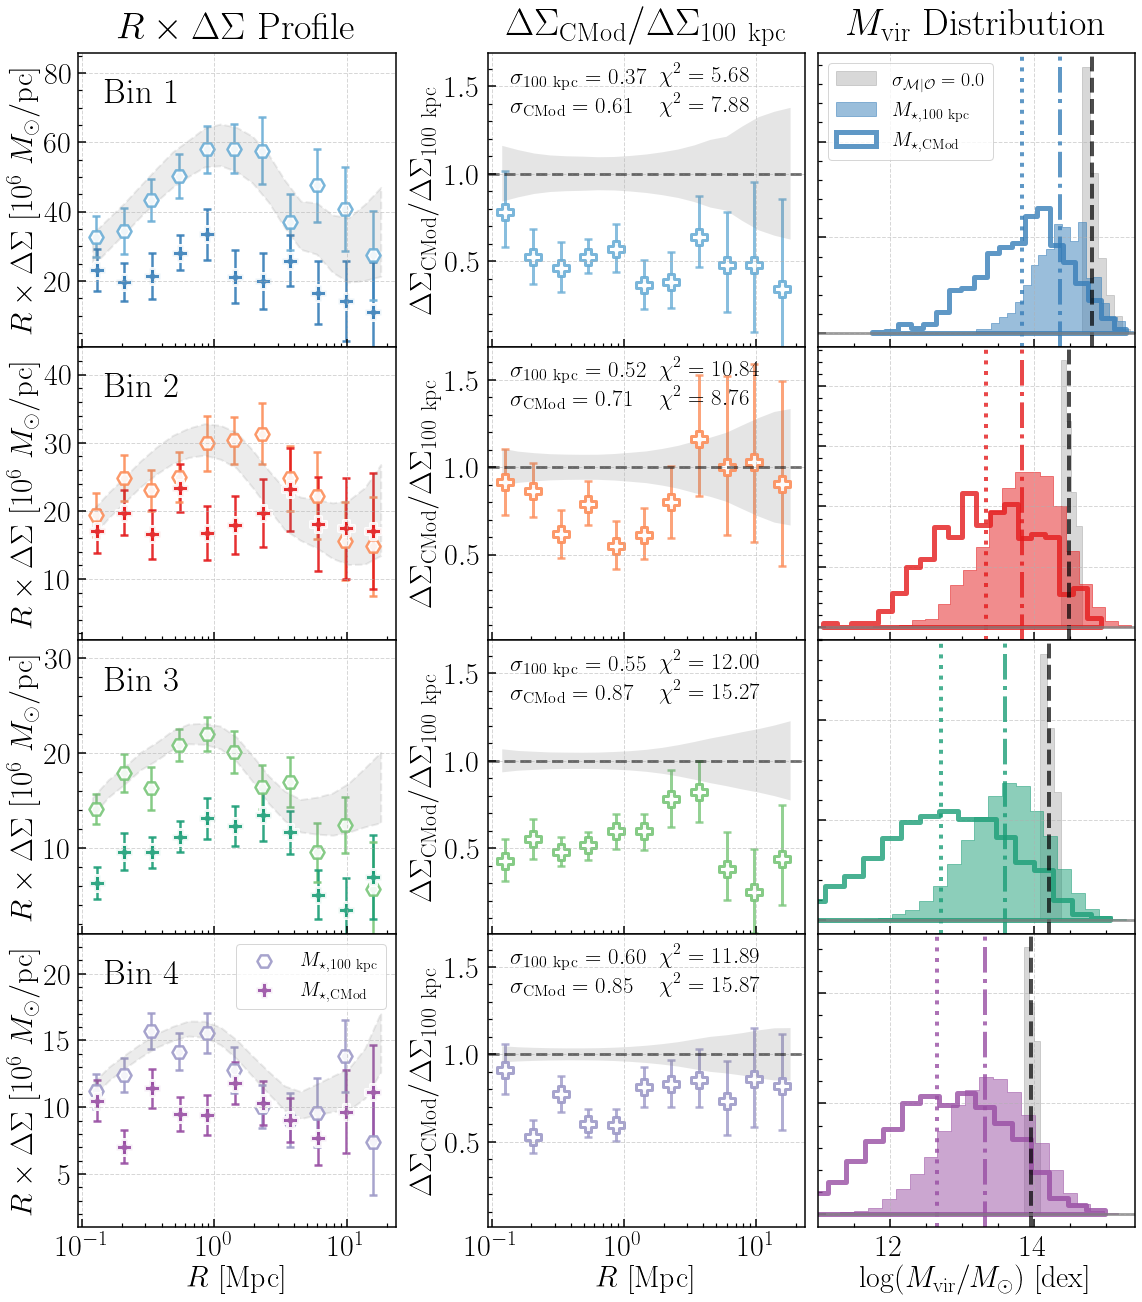

In [17]:
dsig_ref = m100_dsig
label_ref = r'$M_{\star,100\ \rm kpc}$'
sub_ref = r'{100\ \rm kpc}'

dsig_cmp = cmod_dsig
label_cmp = r'$M_{\star,\rm CMod}$'
sub_cmp = r'{\rm CMod}'

fig = visual.compare_dsigma_profiles(
    dsig_ref, dsig_cmp, sim_dsig, sim_mhalo, sig_type='jk', compare_to_model=True, use_ref_range=True,
    label_ref=label_ref, label_cmp=label_cmp, sub_ref=sub_ref, sub_cmp=sub_cmp, show_best_ref=True,
    marker_ref='H', marker_cmp='P', msize_ref=200, msize_cmp=280, show_best_cmp=False,
    logmh_range=(11.0, 15.4), ratio_range=(0.01, 1.69), show_stats=True)

In [18]:
fig.savefig(os.path.join(fig_dir, 'fig_7.png'), dpi=120)
fig.savefig(os.path.join(fig_dir, 'fig_7.pdf'), dpi=120)

#### 10 kpc aperture mass v.s. 100 kpc mass

/Users/song/Dropbox/work/submit/jianbing/jianbing/visual.py:475: RuntimeWarning: invalid value encountered in log10
  mod['r_mpc'], np.log10(ref_rand), fill_value='extrapolate')(r_mpc_obs)


Mean ratio in Bin 1: 0.478+/-0.164
Mean Mvir: 14.362 v.s. 13.446
Difference of Mvir in Bin 1: 0.916


/Users/song/Dropbox/work/submit/jianbing/jianbing/visual.py:475: RuntimeWarning: invalid value encountered in log10
  mod['r_mpc'], np.log10(ref_rand), fill_value='extrapolate')(r_mpc_obs)


Mean ratio in Bin 2: 0.653+/-0.135
Mean Mvir: 13.834 v.s. 13.340
Difference of Mvir in Bin 2: 0.494
Mean ratio in Bin 3: 0.800+/-0.110
Mean Mvir: 13.595 v.s. 13.231
Difference of Mvir in Bin 3: 0.364
Mean ratio in Bin 4: 0.872+/-0.106
Mean Mvir: 13.325 v.s. 13.067
Difference of Mvir in Bin 4: 0.258


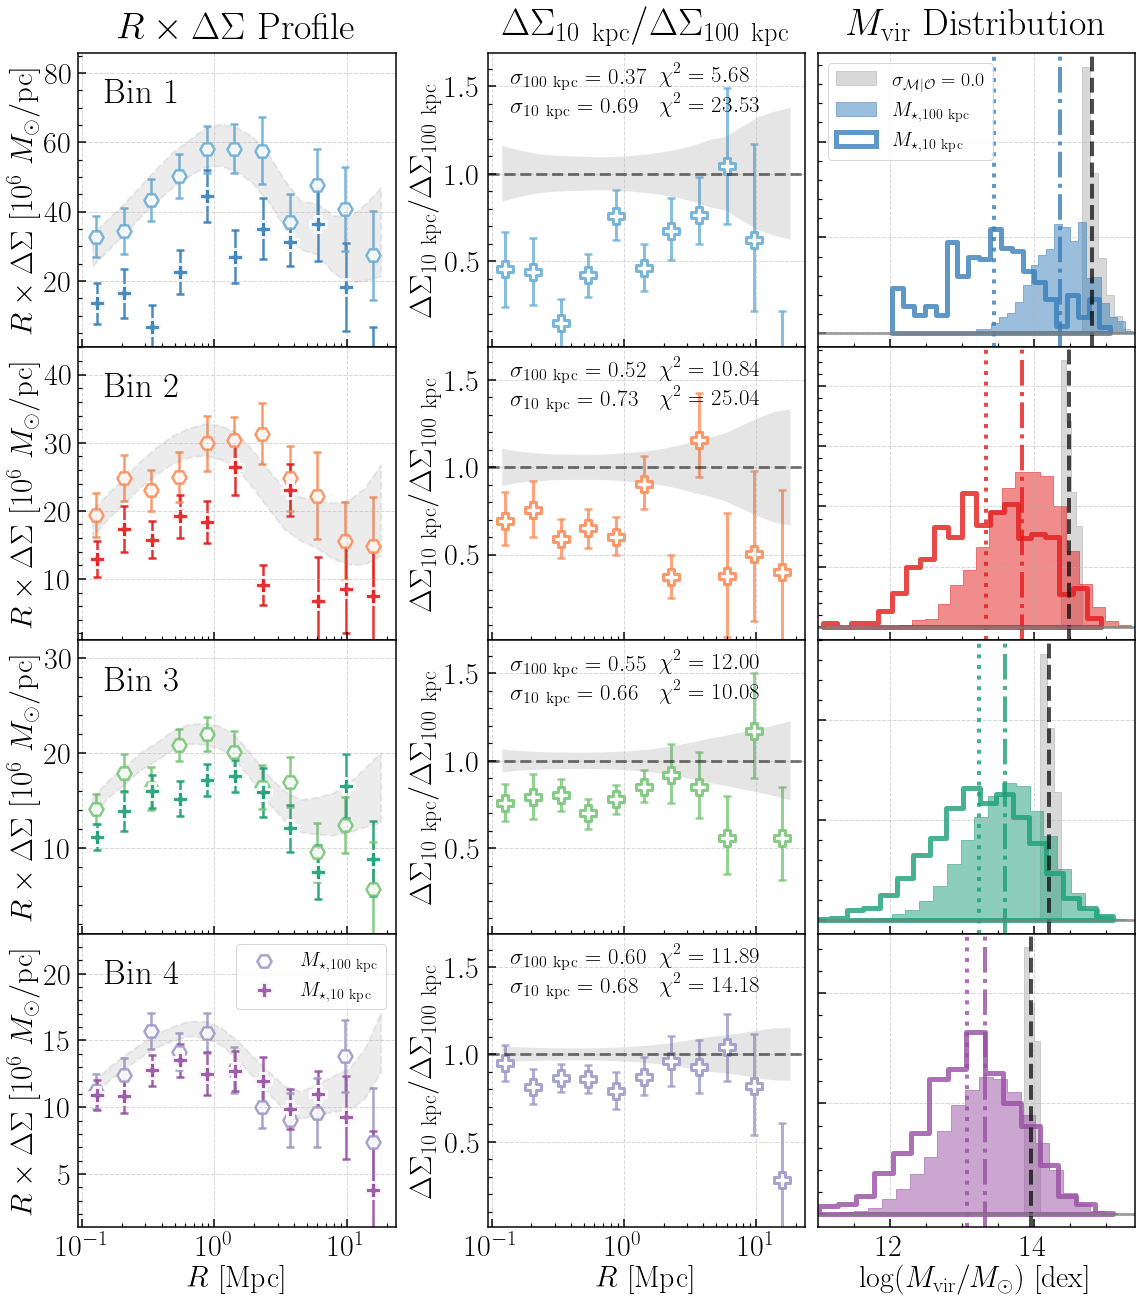

In [19]:
dsig_ref = m100_dsig
label_ref = r'$M_{\star,100\ \rm kpc}$'
sub_ref = r'{100\ \rm kpc}'

dsig_cmp = m10_dsig
label_cmp = r'$M_{\star,10\ \rm kpc}$'
sub_cmp = r'{10\ \rm kpc}'

fig = visual.compare_dsigma_profiles(
    dsig_ref, dsig_cmp, sim_dsig, sim_mhalo, sig_type='jk', compare_to_model=True, use_ref_range=True,
    label_ref=label_ref, label_cmp=label_cmp, sub_ref=sub_ref, sub_cmp=sub_cmp, show_best_ref=True,
    marker_ref='H', marker_cmp='P', msize_ref=200, msize_cmp=280, show_best_cmp=False,
    logmh_range=(11.0, 15.4), ratio_range=(0.01, 1.69), show_stats=True)

#### 30 kpc aperture stellar mass v.s. 100 kpc mass

/Users/song/Dropbox/work/submit/jianbing/jianbing/visual.py:475: RuntimeWarning: invalid value encountered in log10
  mod['r_mpc'], np.log10(ref_rand), fill_value='extrapolate')(r_mpc_obs)


Mean ratio in Bin 1: 0.684+/-0.176
Mean Mvir: 14.362 v.s. 13.977
Difference of Mvir in Bin 1: 0.385


/Users/song/Dropbox/work/submit/jianbing/jianbing/visual.py:475: RuntimeWarning: invalid value encountered in log10
  mod['r_mpc'], np.log10(ref_rand), fill_value='extrapolate')(r_mpc_obs)


Mean ratio in Bin 2: 0.903+/-0.169
Mean Mvir: 13.834 v.s. 13.749
Difference of Mvir in Bin 2: 0.085
Mean ratio in Bin 3: 0.885+/-0.116
Mean Mvir: 13.595 v.s. 13.500
Difference of Mvir in Bin 3: 0.095
Mean ratio in Bin 4: 1.016+/-0.115
Mean Mvir: 13.325 v.s. 13.325
Difference of Mvir in Bin 4: 0.000


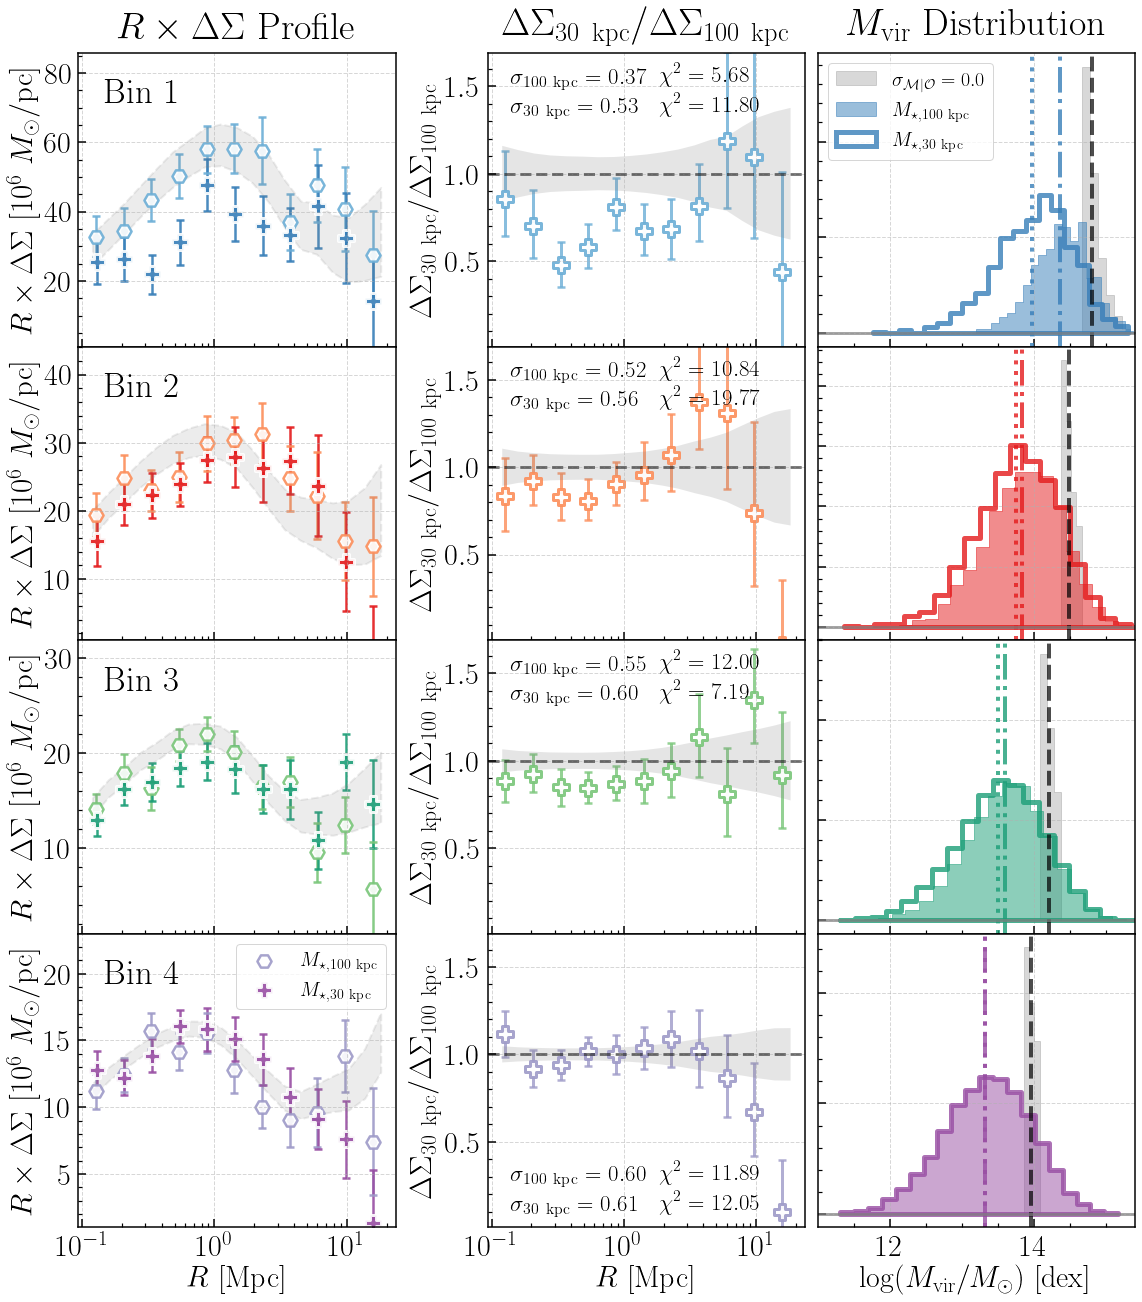

In [20]:
dsig_ref = m100_dsig
label_ref = r'$M_{\star,100\ \rm kpc}$'
sub_ref = r'{100\ \rm kpc}'

dsig_cmp = m30_dsig
label_cmp = r'$M_{\star,30\ \rm kpc}$'
sub_cmp = r'{30\ \rm kpc}'

fig = visual.compare_dsigma_profiles(
    dsig_ref, dsig_cmp, sim_dsig, sim_mhalo, sig_type='jk', compare_to_model=True, use_ref_range=True,
    label_ref=label_ref, label_cmp=label_cmp, sub_ref=sub_ref, sub_cmp=sub_cmp, show_best_ref=True,
    marker_ref='H', marker_cmp='P', msize_ref=200, msize_cmp=280, show_best_cmp=False,
    logmh_range=(11.0, 15.4), ratio_range=(0.01, 1.69), show_stats=True)

#### 50 kpc aperture stellar mass v.s. 100 kpc

/Users/song/Dropbox/work/submit/jianbing/jianbing/visual.py:475: RuntimeWarning: invalid value encountered in log10
  mod['r_mpc'], np.log10(ref_rand), fill_value='extrapolate')(r_mpc_obs)


Mean ratio in Bin 1: 0.809+/-0.180
Mean Mvir: 14.326 v.s. 14.173
Difference of Mvir in Bin 1: 0.153


/Users/song/Dropbox/work/submit/jianbing/jianbing/visual.py:475: RuntimeWarning: invalid value encountered in log10
  mod['r_mpc'], np.log10(ref_rand), fill_value='extrapolate')(r_mpc_obs)


Mean ratio in Bin 2: 0.999+/-0.161
Mean Mvir: 13.834 v.s. 13.817
Difference of Mvir in Bin 2: 0.017
Mean ratio in Bin 3: 0.957+/-0.121
Mean Mvir: 13.541 v.s. 13.508
Difference of Mvir in Bin 3: 0.033
Mean ratio in Bin 4: 1.038+/-0.114
Mean Mvir: 13.325 v.s. 13.325
Difference of Mvir in Bin 4: 0.000


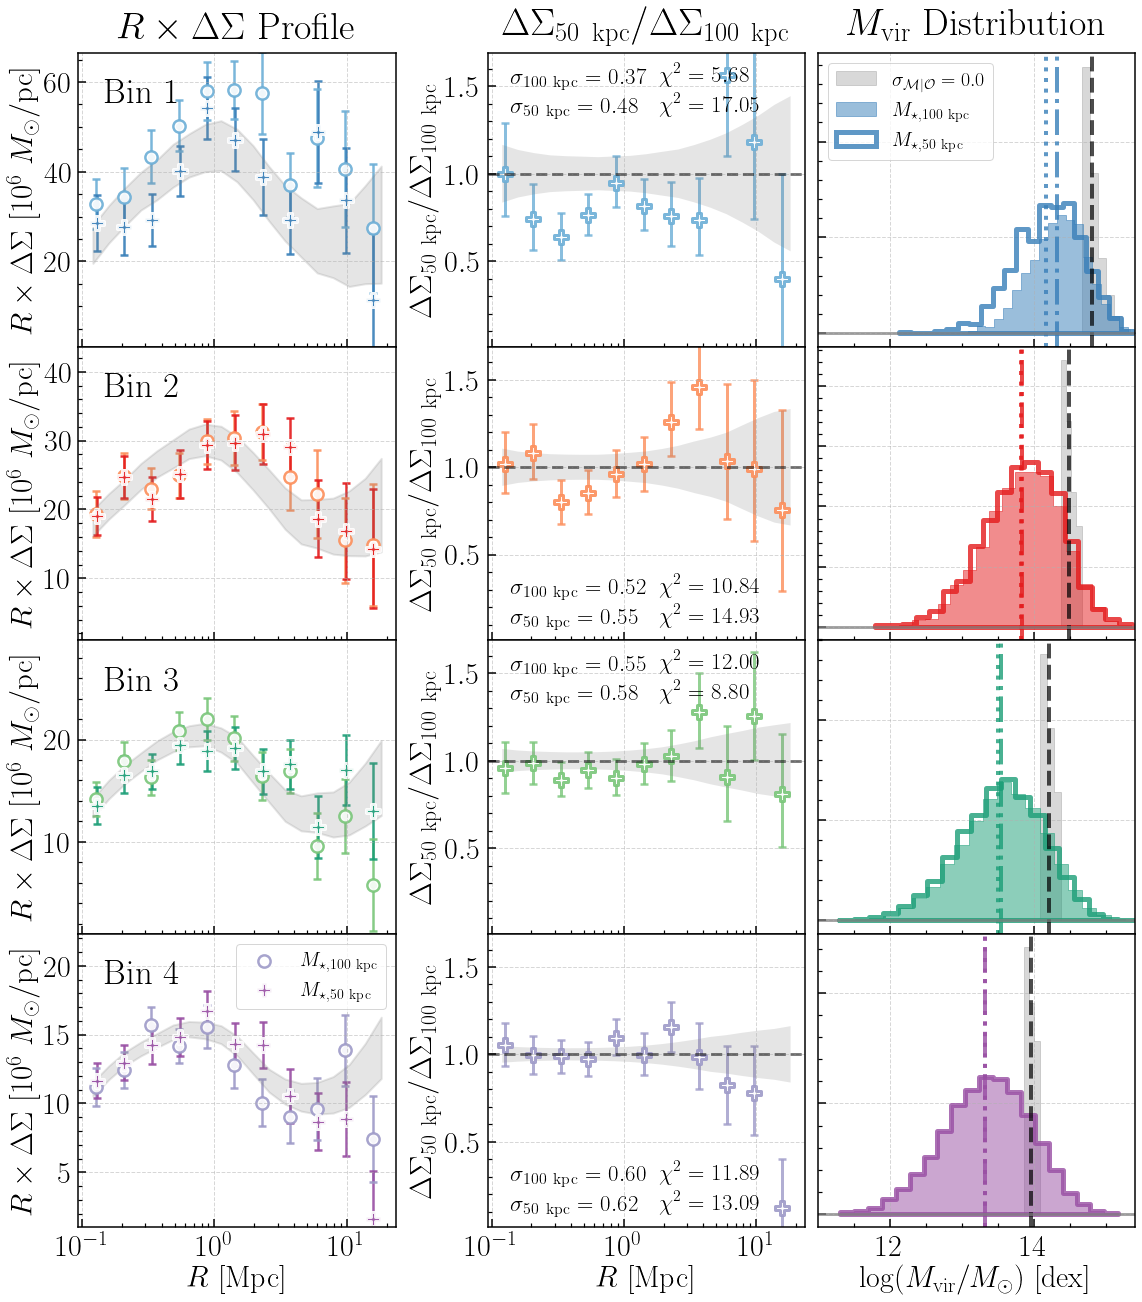

In [21]:
dsig_ref = m100_dsig
label_ref = r'$M_{\star,100\ \rm kpc}$'
sub_ref = r'{100\ \rm kpc}'

dsig_cmp = m50_dsig
label_cmp = r'$M_{\star,50\ \rm kpc}$'
sub_cmp = r'{50\ \rm kpc}'

fig = visual.compare_dsigma_profiles(
    dsig_ref, dsig_cmp, sim_dsig, sim_mhalo, sig_type='bt', compare_to_model=True,
    label_ref=label_ref, label_cmp=label_cmp, sub_ref=sub_ref, sub_cmp=sub_cmp,
    logmh_range=(11.0, 15.4), ratio_range=(0.01, 1.69), show_stats=True)